# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Adri Sopiana
- **Email:** adrisopiana@apps.ipb.ac.id
- **ID Dicoding:** adrisopiana

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat penjualan di tahun 2016, 2017, dan 2018?
- Kategori produk apa yang memiliki massa yang paling besar dan paling ringan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
product_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
product_categories_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/product_category_name_translation.csv")
product_categories_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dari data order saya mendapatkan informasi tentang kapan waktu pembelian.
- Dari data product saya mendapatkan informasi category product, weight, length, width dan lainnya.

### Assessing Data

In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [8]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [9]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


### Cleaning Data

In [10]:
orders_df.fillna(value="order_delivered_customer_date", inplace=True)

In [11]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [12]:
product_df.fillna(value="product_category_name", inplace=True)

<ipython-input-12-500a57b1c1ad>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'product_category_name' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  product_df.fillna(value="product_category_name", inplace=True)


In [13]:
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- memperbaiki data orders dan product karena ada missing value

## Exploratory Data Analysis (EDA)

In [20]:
# Mengubah kolom 'order_approved_at' menjadi tipe datetime
orders_df['order_approved_at']=pd.to_datetime(orders_df['order_approved_at'], errors='coerce')

In [15]:
# Menggabungkan data 2 dan 3 dengan menyesuaikan nilai pada kolom product_category_name yang berperan sebagai primary key dari product_df dan foreign key dari product_categories_name_translation_df.
# Tujuannya agar nama kategori produk berbahasa inggris
product_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/products_dataset.csv")
product_categories_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/product_category_name_translation.csv")

new_product_df = pd.merge(
    left=product_df,
    right=product_categories_name_translation_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
new_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [16]:
# Pilih kolom yang ingin ditampilkan
df_dipilih = new_product_df[['product_category_name_english', 'product_weight_g']]

# Menampilkan hasilnya
print(df_dipilih)


      product_category_name_english  product_weight_g
0                         perfumery             225.0
1                               art            1000.0
2                    sports_leisure             154.0
3                              baby             371.0
4                        housewares             625.0
...                             ...               ...
32323               furniture_decor           12300.0
32324     construction_tools_lights            1700.0
32325                bed_bath_table            1400.0
32326         computers_accessories             700.0
32327                bed_bath_table            2083.0

[32328 rows x 2 columns]


**Insight:**
- Mengubah kolom 'order_approved_at' menjadi tipe datetime agar bisa dianalisis penjualan perbulan tiap tahunnya.
- Mengetahui massa dari setiap kategori produk dengan nama kategorinya dalam bahasa inggris.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat penjualan Produk perbulan pada setiap tahunnya?


<ipython-input-21-f7a7c2f91142>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_df["order_approved_at"], fontsize=10, rotation=20)
<ipython-input-21-f7a7c2f91142>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=10)
<ipython-input-21-f7a7c2f91142>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_df["order_approved_at"], fontsize=10, rotation=20)
<ipython-input-21-f7a7c2f91142>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=10)
<ipython-input-21-f7a7c2f91142>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_df["order_approved_at"], fontsize=10, rotation=20)
<ipython-input-21-f7a7c2f91142>:53: UserWarning: FixedFormatter should only be used together with Fixed

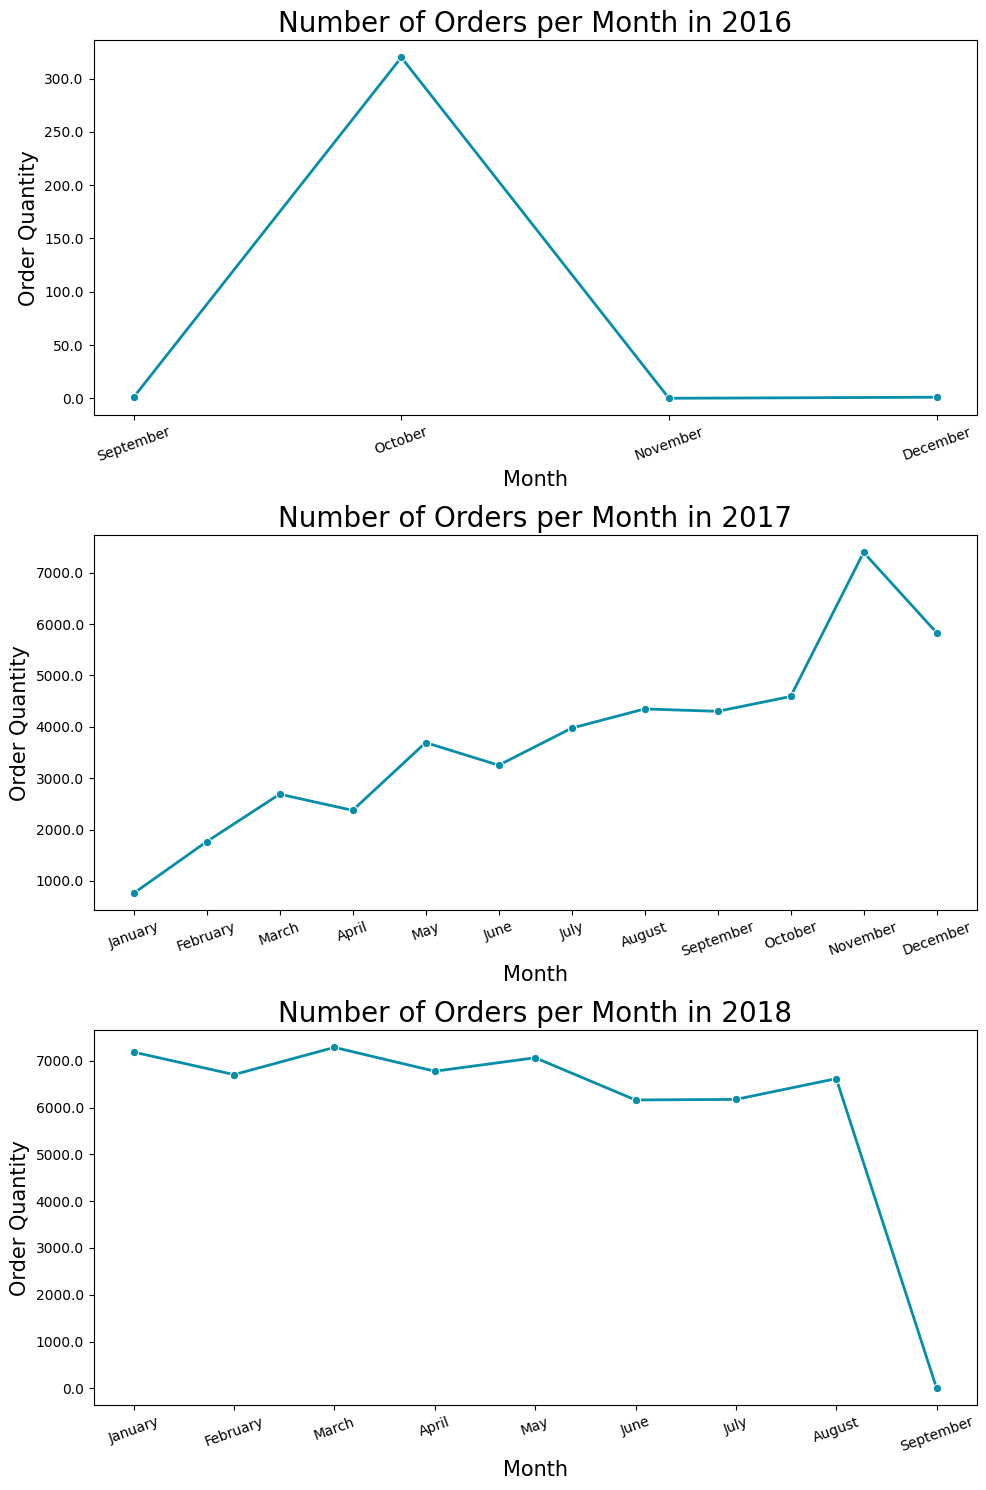

In [21]:
# Membuat figure dengan subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Fungsi untuk memproses dan menampilkan grafik per tahun
def visualisasi_tahun(tahun, ax):
    ax.set_title(f"Number of Orders per Month in {tahun}", loc="center", fontsize=20)

    # Filter data sesuai tahun yang dipilih
    orders_tahun = orders_df[orders_df['order_approved_at'].dt.year == tahun]

    # Set kolom 'order_approved_at' sebagai index
    orders_tahun = orders_tahun.set_index('order_approved_at')

    # Resample per bulan dan hitung jumlah order_id unik
    monthly_df = orders_tahun.resample(rule='ME').agg({
        "order_id": "nunique"
    })

    # Mengubah index menjadi format Tahun-Bulan
    monthly_df.index = monthly_df.index.strftime('%B')

    # Reset index agar kembali menjadi DataFrame
    monthly_df = monthly_df.reset_index()

    # Mengganti kolom order_id menjadi order_count
    monthly_df.rename(columns={"order_id": "order_count"}, inplace=True)

    # Membuat mapping untuk urutan bulan
    month_mapping = {
        "January": 1, "February": 2, "March": 3, "April": 4,
        "May": 5, "June": 6, "July": 7, "August": 8,
        "September": 9, "October": 10, "November": 11, "December": 12
    }

    # Tambahkan kolom angka bulan untuk sorting
    monthly_df["month_numeric"] = monthly_df["order_count"].map(month_mapping)
    monthly_df = monthly_df.sort_values("month_numeric")
    monthly_df = monthly_df.drop("month_numeric", axis=1)

    # Membuat visualisasi dengan Seaborn
    sns.lineplot(
        x=monthly_df["order_approved_at"],
        y=monthly_df["order_count"],
        marker='o',
        linewidth=2,
        color="#068DA9",
        ax=ax
    )

    ax.set_xlabel("Month", fontsize=15)  # Mengatur label sumbu x
    ax.set_ylabel("Order Quantity", fontsize=15)  # Mengatur label sumbu y
    ax.set_xticklabels(monthly_df["order_approved_at"], fontsize=10, rotation=20)
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)

# Visualisasi untuk tahun 2016, 2017, dan 2018
visualisasi_tahun(2016, axes[0])
visualisasi_tahun(2017, axes[1])
visualisasi_tahun(2018, axes[2])

# Mengatur layout
plt.tight_layout()
plt.show()

### Pertanyaan 2: Kategori produk apa yang memiliki massa paling besar dan paling ringan?

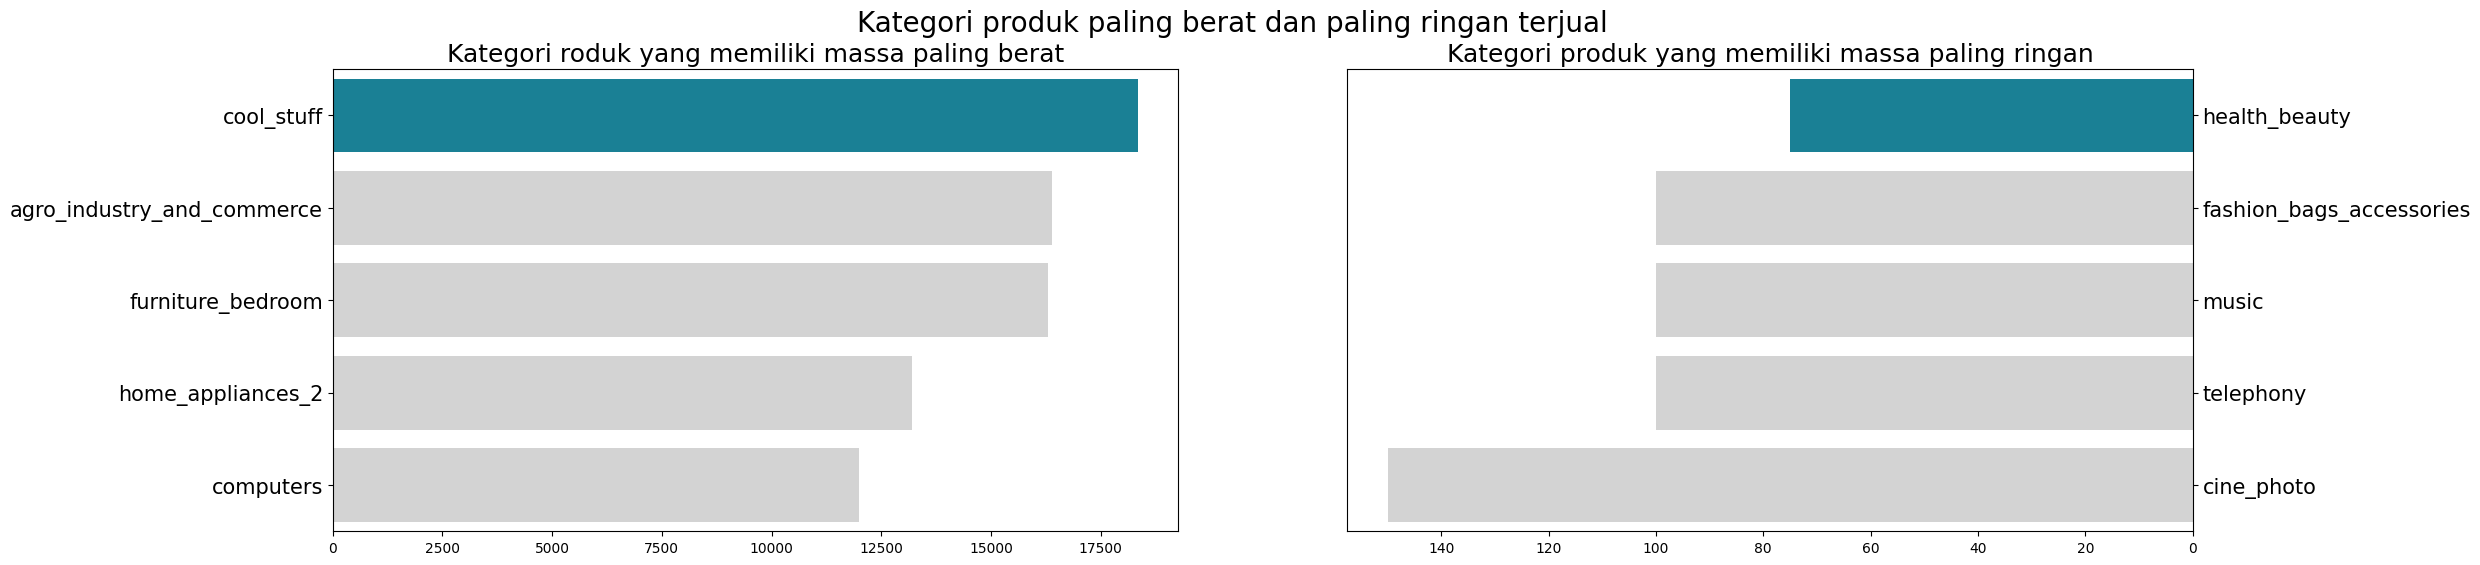

In [23]:
# Hapus duplikat berdasarkan kategori, mempertahankan yang pertama muncul
df_dipilih_unique = df_dipilih.drop_duplicates(subset='product_category_name_english', keep='first')

# Plot 5 kategori produk dengan berat terbesar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot kategori produk dengan berat terbesar (mengambil 5 terbesar)
sns.barplot(x="product_weight_g", y="product_category_name_english",
            hue="product_category_name_english",
            data=df_dipilih_unique.sort_values(by="product_weight_g", ascending=False).head(5),
            palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori roduk yang memiliki massa paling berat", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

# Plot kategori produk dengan berat terkecil (mengambil 5 terkecil)
sns.barplot(x="product_weight_g", y="product_category_name_english",
            hue="product_category_name_english",
            data=df_dipilih_unique.sort_values(by="product_weight_g", ascending=True).head(5),
            palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori produk yang memiliki massa paling ringan", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kategori produk paling berat dan paling ringan terjual", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
a. Penjualan dimulai pada bulan September 2016. Sampai bulan Oktober penjualan meningkat. Namun ketika masuk ke bulan November performa penjualan menurun dan setelahnya tidak berubah menuju bulan Desember.
b. Di tahun 2017 penjualan cenderung meningkat dari awal bulan Januari hingga November walaupun setelah bulan November penjualan agak menurun.
c. Pada tahun 2018 awalnya penjualan stabil namun diakhir ketika masuk ke bulan September penjualan menurun drastis.
Insight yang bisa diambil tindakan atau digunakan untuk membuat keputusan yaitu penjualan harus menggunakan sistem seperti pada tahun 2017 yaitu cenderung meningkat. Jadi artinya ketika penjualan turun di tahun 2016 pada bulan November ini biasa terjadi. Namun tetap berusaha agar hasil bisa maksimal. Hasil itu bisa terjadi mungkin menurut saya pada awal penjualan, pembeli belum mengetahui tentang e-commerce tersebut. Namun seiring berjalannya waktu informasi tersebar dan penjualan meningkat. Dan semakin ke sini penjualan tersebut cenderung stabil. Karena menurut saya pribadi e-commerce selain memiliki keunggulan di sisi lain juga terdapat kekurangan karena pembeli tidak dapat mengetahui langsung produk e-commerce tersebut.
- Conclution pertanyaan 2 : Kategori produk dengan massa yang paling berat yaitu cool_stuff dan yang paling ringan yaitu health_beauty. Keterangan massa kategori produk ini bisa berguna buat keperluan pengiriman barang. Yang dimana pengiman barang ini yang sering diperhatikan yaitu massanya.